In [1]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
meta_df = pd.read_csv("fc.tsv",sep="\t", index_col=0)
meta_df = meta_df[["Timepoint","Stimuli","Sample"]]
meta_df

Timepoint Stimuli  Sample
0_2G3              3       G       2
1_2G3              3       G       2
2_2G3              3       G       2
3_2G3              3       G       2
4_2G3              3       G       2
...              ...     ...     ...
4592_4B46         46       B       4
4593_4B46         46       B       4
4594_4B46         46       B       4
4595_4B46         46       B       4
4596_4B46         46       B       4

[25577941 rows x 3 columns]

In [5]:
embedding = pickle.load(open("umap_results.p","rb"))
embedding

array([[ 14.301497 ,  -5.806734 ],
       [ -0.9557591, -15.899615 ],
       [ 11.957989 ,   9.023507 ],
       ...,
       [ -1.963811 ,  -0.5268107],
       [  9.15024  ,  -1.1823806],
       [ -9.841979 ,   0.8918857]], dtype=float32)

In [6]:
data_df = meta_df.copy()
data_df["embedding_1"] = embedding[:,0]
data_df["embedding_2"] = embedding[:,1]
data_df.head()

Timepoint Stimuli  Sample  embedding_1  embedding_2
0_2G3          3       G       2    14.301497    -5.806734
1_2G3          3       G       2    -0.955759   -15.899615
2_2G3          3       G       2    11.957989     9.023507
3_2G3          3       G       2    15.579118    -3.289548
4_2G3          3       G       2    13.120339    -2.882156

In [24]:
stimuli_map = dict()
for i,val in enumerate(data_df["Stimuli"].unique()):
    stimuli_map[val] = i

timepoint_map = dict()
for i,val in enumerate(data_df["Timepoint"].unique()):
    timepoint_map[val] = i

In [ ]:
stimuli_map = dict()
for i,val in enumerate(data_df["Stimuli"].unique()):
    stimuli_map[val] = i

timepoint_map = dict()
for i,val in enumerate(data_df["Timepoint"].unique()):
    timepoint_map[val] = i

94776
94912
95386
96004
96220
96195
95702
95634
94879
94234
92833
91506
90214
87830
85208
82529
79760
77052
74332
71954
69613
67494
65926
64279
63159
62381
61760
61713
61557
61853
61470
61334
61698
62125
62111
62099
61751
61560
61637
61056
61098
60631
60344
60196
60026
60077
100324
99314
98916
98378
97680
96730
95692
94785
93658
92194
90757
89191
87245
85483
83390
81399
79220
77122
74646
72340
70499
68613
67169
65689
64374
63232
62145
61358
60706
59850
59503
59107
58892
58394
58184
57901
57991
57933
57816
57837
57759
57792
57731
57709
57699
57665
96907
96103
95269
93130
90283
87042
83400
80122
76616
73691
71234
69323
67604
66692
65535
65111
64712
64625
64738
64595
64764
64808
65481
66088
66190
66310
66645
67045
67450
67441
67415
67771
67520
67146
67558
67226
66829
66710
66073
66113
65847
66086
65836
65607
65108
65381
105704
103842
101396
97523
92548
87078
82357
77823
74239
71847
70036
68909
68050
67374
66946
66583
66408
66253
66189
66548
66806
66665
66950
67628
67736
67879
68091
68108


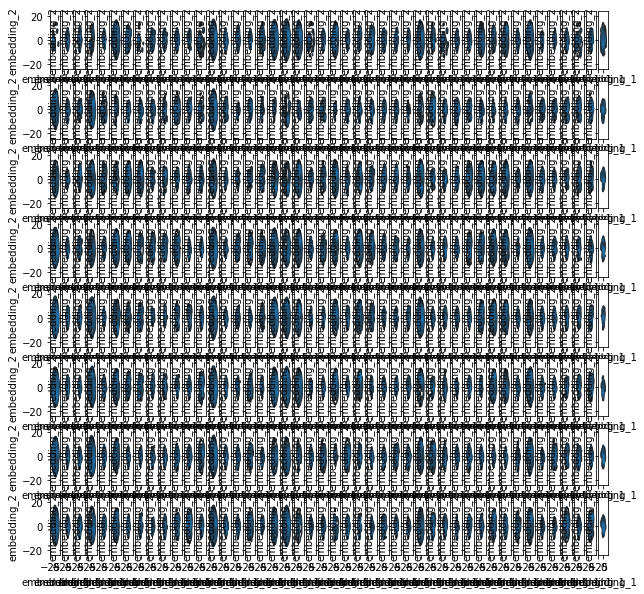

In [73]:
f, axes = plt.subplots(nrows=len(stimuli_map),
                     ncols=len(timepoint_map),
                     figsize=(10, 10),sharex=True,sharey=True)

for ind,val in data_df.groupby(["Stimuli","Timepoint"]):
#     ax[int(ind)].hexbin(embedding[val.index[:100], 0], 
#                 embedding[val.index[:100],1], 
#                 color=sns.color_palette()[int(ind)],gridsize=1000)#,ax=ax[int(ind)])
    print(len(val))
    sns.kdeplot(val["embedding_1"].iloc[:1000], 
                val["embedding_2"].iloc[:1000], 
                ax=axes[stimuli_map[ind[0]],timepoint_map[ind[1]]]
                )
    

In [75]:
f.set_size_inches(30, 20)
f.savefig('embed_1000.png', dpi=300)

In [76]:
pickle.dump(f,open('embed_1000.p','wb'))

In [85]:
for ind,val in data_df.groupby(["Stimuli","Timepoint"]):
    axes[stimuli_map[ind[0]], timepoint_map[ind[1]]].set_yticklabels([])
    axes[stimuli_map[ind[0]], timepoint_map[ind[1]]].set_xticklabels([])
    axes[stimuli_map[ind[0]], timepoint_map[ind[1]]].set_xlabel('')
    axes[stimuli_map[ind[0]], timepoint_map[ind[1]]].set_ylabel('')

for ind,val in data_df.groupby(["Stimuli"]):
    axes[stimuli_map[ind],0].set_ylabel(ind)
    
for ind,val in data_df.groupby(["Timepoint"]):
    axes[-1,timepoint_map[ind]].set_xlabel(ind)

f.savefig('embed_1000.png', dpi=300)

In [89]:
import numpy as np

In [91]:
import tqdm

In [94]:
data_df

Timepoint Stimuli  Sample  embedding_1  embedding_2
0_2G3              3       G       2    14.301497    -5.806734
1_2G3              3       G       2    -0.955759   -15.899615
2_2G3              3       G       2    11.957989     9.023507
3_2G3              3       G       2    15.579118    -3.289548
4_2G3              3       G       2    13.120339    -2.882156
...              ...     ...     ...          ...          ...
4592_4B46         46       B       4     2.484844    -0.237649
4593_4B46         46       B       4    -8.959856    -0.750854
4594_4B46         46       B       4    -1.963811    -0.526811
4595_4B46         46       B       4     9.150240    -1.182381
4596_4B46         46       B       4    -9.841979     0.891886

[25577941 rows x 5 columns]

  0%|          | 1/368 [00:05<30:47,  5.04s/it]

94776
100324
96907


  1%|▏         | 5/368 [00:05<15:13,  2.52s/it]

105704
96649
98930


  2%|▏         | 7/368 [00:05<10:46,  1.79s/it]

91628
91406
94912


  3%|▎         | 11/368 [00:05<05:30,  1.08it/s]

99314
96103
103842


  4%|▎         | 13/368 [00:06<04:00,  1.48it/s]

95355
97044
90142


  4%|▍         | 16/368 [00:06<02:14,  2.61it/s]

90413
95386
98916


  5%|▌         | 20/368 [00:06<01:22,  4.21it/s]

95269
101396
94459


  6%|▋         | 23/368 [00:07<00:57,  6.00it/s]

95608
89449
87946


  7%|▋         | 25/368 [00:07<00:49,  6.88it/s]

96004
98378
93130


  8%|▊         | 29/368 [00:07<00:41,  8.25it/s]

97523
93247
94401


  8%|▊         | 31/368 [00:07<00:38,  8.82it/s]

89037
81180
96220


 10%|▉         | 35/368 [00:08<00:33,  9.83it/s]

97680
90283
92548


 10%|█         | 37/368 [00:08<00:33,  9.82it/s]

91965
92775


 11%|█         | 39/368 [00:08<00:33,  9.91it/s]

88335
72508
96195


 12%|█▏        | 43/368 [00:09<00:32,  9.98it/s]

96730
87042
87078


 12%|█▏        | 45/368 [00:09<00:31, 10.26it/s]

90797
91494
87477


 13%|█▎        | 49/368 [00:09<00:29, 10.80it/s]

65069
95702
95692


 14%|█▍        | 51/368 [00:09<00:28, 10.93it/s]

83400
82357
89443


 15%|█▍        | 55/368 [00:10<00:28, 11.10it/s]

89698
86073
59716


 15%|█▌        | 57/368 [00:10<00:27, 11.13it/s]

95634
94785
80122


 17%|█▋        | 61/368 [00:10<00:27, 10.96it/s]

77823
87897
88099


 17%|█▋        | 63/368 [00:10<00:27, 10.97it/s]

84946
57226
94879


 18%|█▊        | 67/368 [00:11<00:27, 11.07it/s]

93658
76616
74239


 19%|█▉        | 69/368 [00:11<00:27, 11.01it/s]

86565
86427
83482


 20%|█▉        | 73/368 [00:11<00:26, 11.01it/s]

56305
94234
92194


 20%|██        | 75/368 [00:11<00:26, 10.98it/s]

73691
71847
84687


 21%|██▏       | 79/368 [00:12<00:27, 10.64it/s]

84375
81675
56573


 22%|██▏       | 81/368 [00:12<00:26, 10.66it/s]

92833
90757
71234


 23%|██▎       | 85/368 [00:12<00:26, 10.74it/s]

70036
82481
82524


 24%|██▎       | 87/368 [00:13<00:26, 10.71it/s]

79744
57118
91506


 25%|██▍       | 91/368 [00:13<00:25, 10.73it/s]

89191
69323
68909


 25%|██▌       | 93/368 [00:13<00:25, 10.68it/s]

80478
80438
77420


 26%|██▋       | 97/368 [00:14<00:25, 10.57it/s]

57946
90214
87245


 27%|██▋       | 99/368 [00:14<00:25, 10.53it/s]

67604
68050
78033


 28%|██▊       | 103/368 [00:14<00:25, 10.58it/s]

78074
75105
59030


 29%|██▊       | 105/368 [00:14<00:24, 10.59it/s]

87830
85483
66692


 30%|██▉       | 109/368 [00:15<00:24, 10.61it/s]

67374
75937
75832


 30%|███       | 111/368 [00:15<00:24, 10.49it/s]

72492
59829
85208


 31%|███▏      | 115/368 [00:15<00:24, 10.33it/s]

83390
65535
66946


 32%|███▏      | 117/368 [00:15<00:24, 10.37it/s]

73417
73358
69949


 33%|███▎      | 121/368 [00:16<00:23, 10.39it/s]

61107
82529
81399


 33%|███▎      | 123/368 [00:16<00:23, 10.41it/s]

65111
66583
71485


 35%|███▍      | 127/368 [00:16<00:23, 10.41it/s]

71366
67391
61665


 35%|███▌      | 129/368 [00:17<00:23, 10.26it/s]

79760
79220
64712


 36%|███▌      | 133/368 [00:17<00:22, 10.24it/s]

66408
69487
69330


 37%|███▋      | 135/368 [00:17<00:22, 10.22it/s]

65065
62741
77052


 38%|███▊      | 139/368 [00:18<00:22, 10.28it/s]

77122
64625
66253


 38%|███▊      | 141/368 [00:18<00:22, 10.26it/s]

67487
67212
63061


 39%|███▉      | 143/368 [00:18<00:22, 10.19it/s]

63236
74332


 40%|███▉      | 147/368 [00:18<00:21, 10.10it/s]

74646
64738
66189


 40%|████      | 149/368 [00:19<00:21, 10.02it/s]

65943
65346
61140


 42%|████▏     | 153/368 [00:19<00:21, 10.06it/s]

63854
71954
72340


 42%|████▏     | 155/368 [00:19<00:21, 10.06it/s]

64595
66548
64565


 43%|████▎     | 157/368 [00:19<00:21,  9.99it/s]

63831
59206


 43%|████▎     | 160/368 [00:20<00:21,  9.86it/s]

64348
69613


 44%|████▍     | 162/368 [00:20<00:21,  9.80it/s]

70499
64764


 45%|████▍     | 165/368 [00:20<00:20,  9.91it/s]

66806
63477
62485


 46%|████▌     | 168/368 [00:21<00:20,  9.89it/s]

57696
64489
67494


 46%|████▋     | 171/368 [00:21<00:19,  9.90it/s]

68613
64808
66665


 47%|████▋     | 173/368 [00:21<00:19,  9.81it/s]

62444
61464


 48%|████▊     | 176/368 [00:21<00:19,  9.85it/s]

56574
64848
65926


 48%|████▊     | 178/368 [00:22<00:19,  9.77it/s]

67169
65481


 49%|████▉     | 181/368 [00:22<00:19,  9.77it/s]

66950
61537


 50%|████▉     | 183/368 [00:22<00:18,  9.84it/s]

60308
55494
65096


 50%|█████     | 185/368 [00:22<00:18,  9.83it/s]

64279
65689


 51%|█████     | 187/368 [00:22<00:18,  9.85it/s]

66088
67628


 51%|█████▏    | 189/368 [00:23<00:18,  9.67it/s]

61007
59509


 52%|█████▏    | 191/368 [00:23<00:18,  9.72it/s]

54394
65291


 52%|█████▏    | 193/368 [00:23<00:17,  9.77it/s]

63159
64374


 53%|█████▎    | 195/368 [00:23<00:18,  9.57it/s]

66190
67736


 54%|█████▎    | 197/368 [00:24<00:17,  9.57it/s]

60660
58873


 54%|█████▍    | 199/368 [00:24<00:17,  9.63it/s]

53804
65092


 55%|█████▍    | 201/368 [00:24<00:17,  9.64it/s]

62381
63232


 55%|█████▌    | 203/368 [00:24<00:17,  9.63it/s]

66310
67879


 56%|█████▌    | 205/368 [00:24<00:16,  9.68it/s]

60178
58018


 56%|█████▋    | 207/368 [00:25<00:16,  9.65it/s]

52823
64973


 57%|█████▋    | 209/368 [00:25<00:16,  9.60it/s]

61760
62145


 57%|█████▋    | 211/368 [00:25<00:16,  9.55it/s]

66645
68091


 58%|█████▊    | 213/368 [00:25<00:16,  9.55it/s]

59823
57436


 58%|█████▊    | 215/368 [00:25<00:15,  9.58it/s]

52008
64567


 59%|█████▉    | 217/368 [00:26<00:15,  9.53it/s]

61713
61358


 60%|█████▉    | 219/368 [00:26<00:15,  9.49it/s]

67045
68108


 60%|██████    | 221/368 [00:26<00:15,  9.51it/s]

60004
57271


 61%|██████    | 223/368 [00:26<00:15,  9.49it/s]

51738
64801


 61%|██████    | 225/368 [00:26<00:15,  9.47it/s]

61557
60706


 62%|██████▏   | 227/368 [00:27<00:14,  9.42it/s]

67450
68351


 62%|██████▎   | 230/368 [00:27<00:14,  9.64it/s]

59735
56869
51072


 63%|██████▎   | 233/368 [00:27<00:13,  9.73it/s]

64546
61853
59850


 64%|██████▍   | 236/368 [00:28<00:13,  9.72it/s]

67441
68583
60086


 65%|██████▍   | 238/368 [00:28<00:13,  9.72it/s]

56699
50661


 65%|██████▌   | 241/368 [00:28<00:12,  9.85it/s]

64477
61470
59503


 66%|██████▌   | 243/368 [00:28<00:12,  9.85it/s]

67415
68319


 67%|██████▋   | 245/368 [00:28<00:12,  9.84it/s]

60151
56493


 67%|██████▋   | 247/368 [00:29<00:12,  9.62it/s]

50535
64265


 68%|██████▊   | 249/368 [00:29<00:12,  9.42it/s]

61334
59107


 68%|██████▊   | 251/368 [00:29<00:12,  9.26it/s]

67771
68586


 69%|██████▉   | 253/368 [00:29<00:12,  9.18it/s]

60273
56380


 69%|██████▉   | 255/368 [00:30<00:12,  9.25it/s]

50260
64121


 70%|██████▉   | 257/368 [00:30<00:12,  9.20it/s]

61698
58892


 70%|███████   | 259/368 [00:30<00:11,  9.18it/s]

67520
68704


 71%|███████   | 261/368 [00:30<00:11,  9.19it/s]

60289
56540


 71%|███████▏  | 263/368 [00:30<00:11,  9.22it/s]

49858
64314


 72%|███████▏  | 265/368 [00:31<00:11,  9.17it/s]

62125
58394


 73%|███████▎  | 267/368 [00:31<00:11,  9.13it/s]

67146
68498


 73%|███████▎  | 269/368 [00:31<00:10,  9.26it/s]

60174
56641


 74%|███████▎  | 271/368 [00:31<00:10,  9.36it/s]

49762
63973


 74%|███████▍  | 273/368 [00:32<00:10,  9.20it/s]

62111
58184


 75%|███████▍  | 275/368 [00:32<00:10,  9.27it/s]

67558
68690


 75%|███████▌  | 277/368 [00:32<00:09,  9.41it/s]

60232
56500


 76%|███████▌  | 279/368 [00:32<00:09,  9.22it/s]

49619
63818


 76%|███████▋  | 281/368 [00:32<00:09,  9.10it/s]

62099
57901


 77%|███████▋  | 283/368 [00:33<00:09,  9.04it/s]

67226
68158


 77%|███████▋  | 285/368 [00:33<00:09,  8.91it/s]

60386
56460


 78%|███████▊  | 287/368 [00:33<00:09,  8.85it/s]

49283
63575


 79%|███████▊  | 289/368 [00:33<00:08,  8.88it/s]

61751
57991


 79%|███████▉  | 291/368 [00:34<00:08,  8.89it/s]

66829
68043


 80%|███████▉  | 293/368 [00:34<00:08,  8.80it/s]

60189
56309


 80%|████████  | 295/368 [00:34<00:08,  8.83it/s]

49113
63795


 81%|████████  | 297/368 [00:34<00:08,  8.85it/s]

61560
57933


 81%|████████▏ | 299/368 [00:34<00:07,  8.72it/s]

66710
67904


 82%|████████▏ | 301/368 [00:35<00:07,  8.80it/s]

60267
56078


 82%|████████▏ | 303/368 [00:35<00:07,  8.80it/s]

49043
63605


 83%|████████▎ | 305/368 [00:35<00:07,  8.76it/s]

61637
57816


 83%|████████▎ | 307/368 [00:35<00:06,  8.76it/s]

66073
67506


 84%|████████▍ | 309/368 [00:36<00:06,  8.75it/s]

59862
56132


 85%|████████▍ | 311/368 [00:36<00:06,  8.65it/s]

48792
63501


 85%|████████▌ | 313/368 [00:36<00:06,  8.68it/s]

61056
57837


 86%|████████▌ | 315/368 [00:36<00:06,  8.70it/s]

66113
67500


 86%|████████▌ | 317/368 [00:36<00:05,  8.74it/s]

59893
56105


 87%|████████▋ | 319/368 [00:37<00:05,  8.74it/s]

48511
63516


 87%|████████▋ | 321/368 [00:37<00:05,  8.78it/s]

61098
57759


 88%|████████▊ | 323/368 [00:37<00:05,  8.57it/s]

65847
67470


 88%|████████▊ | 325/368 [00:37<00:04,  8.68it/s]

60024
55970


 89%|████████▉ | 327/368 [00:38<00:04,  8.72it/s]

48448
63542


 89%|████████▉ | 329/368 [00:38<00:04,  8.72it/s]

60631
57792


 90%|████████▉ | 331/368 [00:38<00:04,  8.68it/s]

66086
67497


 90%|█████████ | 333/368 [00:38<00:03,  8.85it/s]

59410
56007


 91%|█████████ | 335/368 [00:39<00:03,  8.70it/s]

48031
63492


 92%|█████████▏| 337/368 [00:39<00:03,  8.68it/s]

60344
57731


 92%|█████████▏| 339/368 [00:39<00:03,  8.61it/s]

65836
66807


 93%|█████████▎| 341/368 [00:39<00:03,  8.59it/s]

59538
55756


 93%|█████████▎| 343/368 [00:39<00:02,  8.55it/s]

47933
63518


 94%|█████████▍| 345/368 [00:40<00:02,  8.34it/s]

60196
57709


 94%|█████████▍| 347/368 [00:40<00:02,  8.34it/s]

65607
66743


 95%|█████████▍| 349/368 [00:40<00:02,  8.43it/s]

59445
56038


 95%|█████████▌| 351/368 [00:40<00:02,  8.44it/s]

47940
63468


 96%|█████████▌| 353/368 [00:41<00:01,  8.38it/s]

60026
57699


 96%|█████████▋| 355/368 [00:41<00:01,  8.23it/s]

65108
66511


 97%|█████████▋| 357/368 [00:41<00:01,  8.20it/s]

59136
55463


 98%|█████████▊| 359/368 [00:41<00:01,  8.24it/s]

47559
63052


 98%|█████████▊| 361/368 [00:42<00:00,  8.20it/s]

60077
57665


 99%|█████████▊| 363/368 [00:42<00:00,  8.26it/s]

65381
66411


 99%|█████████▉| 365/368 [00:42<00:00,  8.25it/s]

59183
55643


100%|█████████▉| 367/368 [00:42<00:00,  8.25it/s]

47273
63463


100%|██████████| 368/368 [00:43<00:00,  8.55it/s]


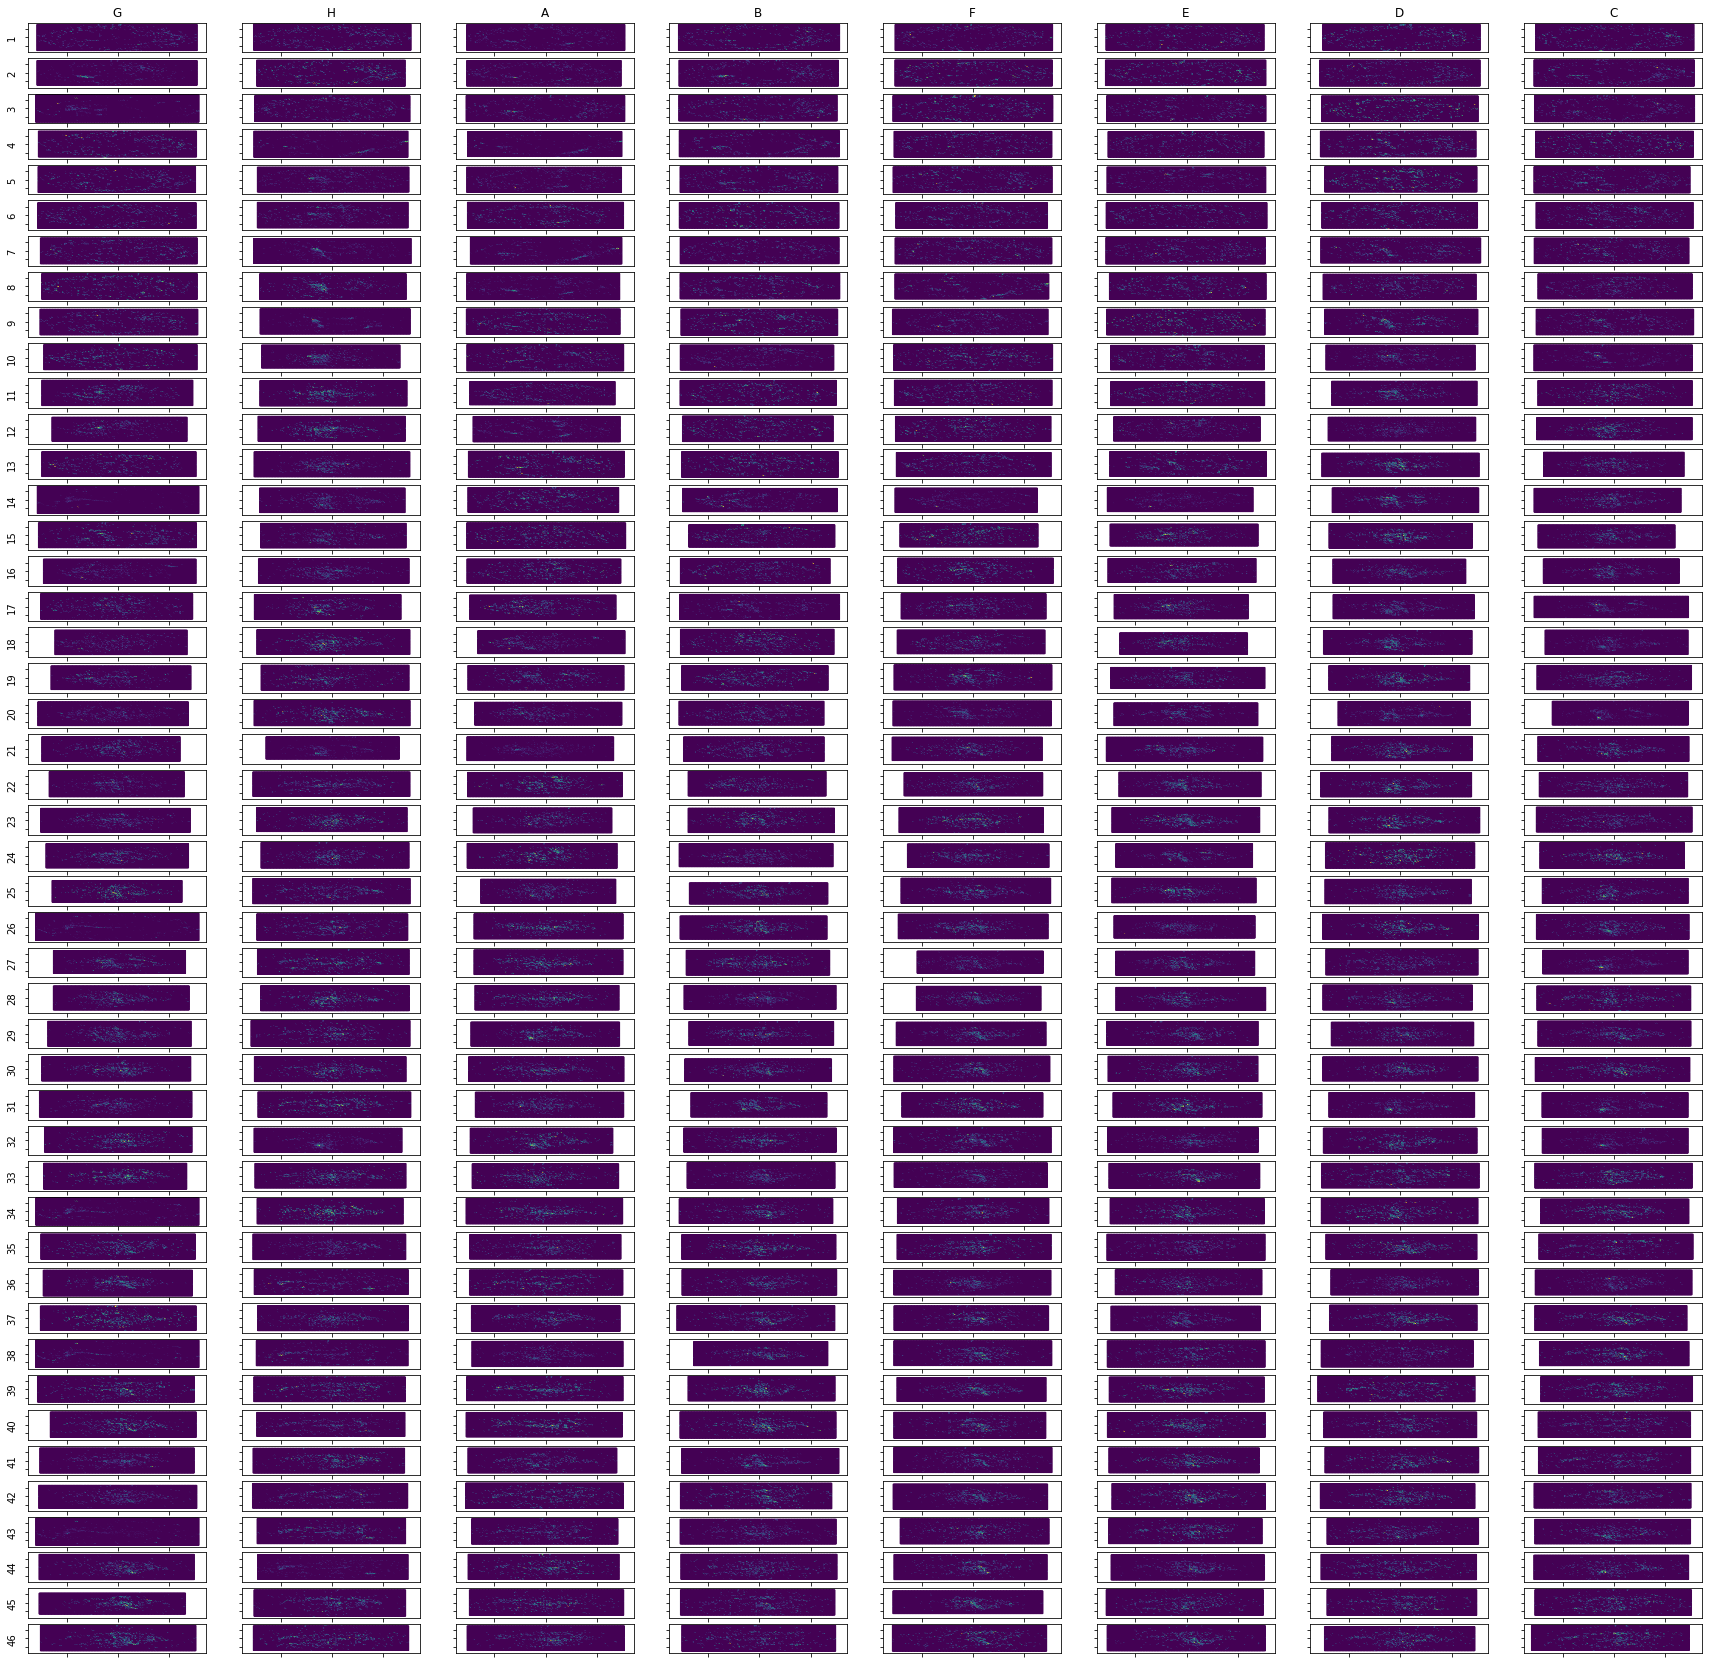

In [96]:
f, axes = plt.subplots(nrows=len(timepoint_map),
                     ncols=len(stimuli_map),
                     figsize=(30, 30),sharex=True,sharey=True)

for ind,val in tqdm.tqdm(data_df.groupby(["Timepoint","Stimuli"])):
    print(len(val))
    
#     sns.kdeplot(val["embedding_1"].iloc[:1000], 
#                 val["embedding_2"].iloc[:1000], 
#                 ax=axes[ind[0],stimuli_map[ind[1]]]
#                 )
    # Timepoint - 1 for indexing
    axes[ind[0]-1,stimuli_map[ind[1]]].hexbin(val["embedding_1"].iloc[:1000], val["embedding_2"].iloc[:1000])
    
    axes[ind[0]-1,stimuli_map[ind[1]]].set_yticklabels([])
    axes[ind[0]-1,stimuli_map[ind[1]]].set_xticklabels([])
    axes[ind[0]-1,stimuli_map[ind[1]]].set_ylabel("")
    axes[ind[0]-1,stimuli_map[ind[1]]].set_xlabel("")

    
for ind, _ in data_df.groupby("Stimuli"):
    axes[0,stimuli_map[ind]].set_title(ind)
    
for ind, _ in data_df.groupby("Timepoint"):
    axes[ind-1,0].set_ylabel(ind)
    
f.savefig('embed_hex_1000.png', dpi=300)
pickle.dump(f,open('embed_hex_1000.p','wb'))

  0%|          | 0/368 [00:00<?, ?it/s]

94776


  0%|          | 1/368 [00:06<39:11,  6.41s/it]

100324


  1%|          | 2/368 [00:08<30:57,  5.07s/it]

96907


  1%|          | 3/368 [00:10<25:09,  4.14s/it]

105704


  1%|          | 4/368 [00:12<21:05,  3.48s/it]

96649


  1%|▏         | 5/368 [00:14<18:16,  3.02s/it]

98930


  2%|▏         | 6/368 [00:16<16:16,  2.70s/it]

91628


  2%|▏         | 7/368 [00:18<14:48,  2.46s/it]

91406


  2%|▏         | 8/368 [00:20<13:50,  2.31s/it]

94912


  2%|▏         | 9/368 [00:21<13:06,  2.19s/it]

99314


  3%|▎         | 10/368 [00:23<12:35,  2.11s/it]

96103


  3%|▎         | 11/368 [00:25<12:13,  2.06s/it]

103842


  3%|▎         | 12/368 [00:27<11:58,  2.02s/it]

95355


  4%|▎         | 13/368 [00:29<11:46,  1.99s/it]

97044


  4%|▍         | 14/368 [00:31<11:37,  1.97s/it]

90142


  4%|▍         | 15/368 [00:33<11:30,  1.96s/it]

90413


  4%|▍         | 16/368 [00:35<11:26,  1.95s/it]

95386


  5%|▍         | 17/368 [00:37<11:21,  1.94s/it]

98916


  5%|▍         | 18/368 [00:39<11:20,  1.94s/it]

95269


  5%|▌         | 19/368 [00:41<11:17,  1.94s/it]

101396


  5%|▌         | 20/368 [00:43<11:15,  1.94s/it]

94459


  6%|▌         | 21/368 [00:45<11:14,  1.94s/it]

95608


  6%|▌         | 22/368 [00:47<11:13,  1.95s/it]

89449


  6%|▋         | 23/368 [00:49<11:11,  1.95s/it]

87946


  7%|▋         | 24/368 [00:50<11:10,  1.95s/it]

96004


  7%|▋         | 25/368 [00:53<12:58,  2.27s/it]

98378


  7%|▋         | 26/368 [00:55<12:20,  2.17s/it]

93130


  7%|▋         | 27/368 [00:57<11:55,  2.10s/it]

97523


  8%|▊         | 28/368 [00:59<11:36,  2.05s/it]

93247


  8%|▊         | 29/368 [01:01<11:29,  2.03s/it]

94401


  8%|▊         | 30/368 [01:03<11:20,  2.01s/it]

89037


  8%|▊         | 31/368 [01:05<11:13,  2.00s/it]

81180


  9%|▊         | 32/368 [01:07<11:06,  1.98s/it]

96220


  9%|▉         | 33/368 [01:09<11:03,  1.98s/it]

97680


  9%|▉         | 34/368 [01:11<10:58,  1.97s/it]

90283


 10%|▉         | 35/368 [01:13<10:54,  1.96s/it]

92548


 10%|▉         | 36/368 [01:15<10:49,  1.96s/it]

91965


 10%|█         | 37/368 [01:17<10:46,  1.95s/it]

92775


 10%|█         | 38/368 [01:19<10:43,  1.95s/it]

88335


 11%|█         | 39/368 [01:21<10:39,  1.94s/it]

72508


 11%|█         | 40/368 [01:23<10:36,  1.94s/it]

96195


 11%|█         | 41/368 [01:25<10:38,  1.95s/it]

96730


 11%|█▏        | 42/368 [01:27<10:35,  1.95s/it]

87042


 12%|█▏        | 43/368 [01:29<10:32,  1.95s/it]

87078


 12%|█▏        | 44/368 [01:31<10:28,  1.94s/it]

90797


 12%|█▏        | 45/368 [01:32<10:25,  1.94s/it]

91494


 12%|█▎        | 46/368 [01:34<10:24,  1.94s/it]

87477


 13%|█▎        | 47/368 [01:36<10:21,  1.94s/it]

65069


 13%|█▎        | 48/368 [01:38<10:21,  1.94s/it]

95702


 13%|█▎        | 49/368 [01:40<10:20,  1.95s/it]

95692


 14%|█▎        | 50/368 [01:42<10:17,  1.94s/it]

83400


 14%|█▍        | 51/368 [01:44<10:16,  1.95s/it]

82357


 14%|█▍        | 52/368 [01:46<10:15,  1.95s/it]

89443


 14%|█▍        | 53/368 [01:48<10:12,  1.94s/it]

89698


 15%|█▍        | 54/368 [01:50<10:10,  1.94s/it]

86073


 15%|█▍        | 55/368 [01:52<10:07,  1.94s/it]

59716


 15%|█▌        | 56/368 [01:54<10:05,  1.94s/it]

95634


 15%|█▌        | 57/368 [01:56<10:04,  1.94s/it]

94785


 16%|█▌        | 58/368 [01:58<10:03,  1.95s/it]

80122


 16%|█▌        | 59/368 [02:00<10:01,  1.95s/it]

77823


 16%|█▋        | 60/368 [02:02<09:59,  1.95s/it]

87897


 17%|█▋        | 61/368 [02:04<09:56,  1.94s/it]

88099


 17%|█▋        | 62/368 [02:05<09:54,  1.94s/it]

84946


 17%|█▋        | 63/368 [02:07<09:53,  1.95s/it]

57226


 17%|█▋        | 64/368 [02:09<09:54,  1.96s/it]

94879


 18%|█▊        | 65/368 [02:11<09:51,  1.95s/it]

93658


 18%|█▊        | 66/368 [02:13<09:52,  1.96s/it]

76616


 18%|█▊        | 67/368 [02:15<09:58,  1.99s/it]

74239


 18%|█▊        | 68/368 [02:17<09:58,  2.00s/it]

86565


 19%|█▉        | 69/368 [02:19<09:53,  1.98s/it]

86427


 19%|█▉        | 70/368 [02:21<09:54,  2.00s/it]

83482


 19%|█▉        | 71/368 [02:23<10:01,  2.02s/it]

56305


 20%|█▉        | 72/368 [02:26<09:59,  2.03s/it]

94234


 20%|█▉        | 73/368 [02:28<10:01,  2.04s/it]

92194


 20%|██        | 74/368 [02:30<09:56,  2.03s/it]

73691


 20%|██        | 75/368 [02:32<09:53,  2.03s/it]

71847


 21%|██        | 76/368 [02:34<09:47,  2.01s/it]

84687


 21%|██        | 77/368 [02:36<09:44,  2.01s/it]

84375


 21%|██        | 78/368 [02:38<09:40,  2.00s/it]

81675


 21%|██▏       | 79/368 [02:40<09:45,  2.03s/it]

56573


 22%|██▏       | 80/368 [02:42<09:47,  2.04s/it]

92833


 22%|██▏       | 81/368 [02:44<09:44,  2.04s/it]

90757


 22%|██▏       | 82/368 [02:46<09:43,  2.04s/it]

71234


 23%|██▎       | 83/368 [02:48<09:41,  2.04s/it]

70036


 23%|██▎       | 84/368 [02:50<09:41,  2.05s/it]

82481


 23%|██▎       | 85/368 [02:52<09:44,  2.06s/it]

82524


 23%|██▎       | 86/368 [02:54<09:38,  2.05s/it]

79744


 24%|██▎       | 87/368 [02:56<09:38,  2.06s/it]

57118


 24%|██▍       | 88/368 [02:58<09:34,  2.05s/it]

91506


 24%|██▍       | 89/368 [03:00<09:28,  2.04s/it]

89191


 24%|██▍       | 90/368 [03:02<09:23,  2.03s/it]

69323


 25%|██▍       | 91/368 [03:04<09:19,  2.02s/it]

68909


 25%|██▌       | 92/368 [03:06<09:14,  2.01s/it]

80478


 25%|██▌       | 93/368 [03:08<09:11,  2.00s/it]

80438


 26%|██▌       | 94/368 [03:10<09:08,  2.00s/it]

77420


 26%|██▌       | 95/368 [03:12<09:05,  2.00s/it]

57946


 26%|██▌       | 96/368 [03:14<09:02,  1.99s/it]

90214


 26%|██▋       | 97/368 [03:16<08:59,  1.99s/it]

87245


 27%|██▋       | 98/368 [03:18<08:56,  1.99s/it]

67604


 27%|██▋       | 99/368 [03:20<08:52,  1.98s/it]

68050


 27%|██▋       | 100/368 [03:22<08:51,  1.98s/it]

78033


 27%|██▋       | 101/368 [03:24<08:47,  1.98s/it]

78074


 28%|██▊       | 102/368 [03:26<08:43,  1.97s/it]

75105


 28%|██▊       | 103/368 [03:28<08:41,  1.97s/it]

59030


 28%|██▊       | 104/368 [03:30<08:39,  1.97s/it]

87830


 29%|██▊       | 105/368 [03:32<08:35,  1.96s/it]

85483


 29%|██▉       | 106/368 [03:34<08:34,  1.96s/it]

66692


 29%|██▉       | 107/368 [03:36<08:30,  1.95s/it]

67374


 29%|██▉       | 108/368 [03:38<08:27,  1.95s/it]

75937


 30%|██▉       | 109/368 [03:40<08:24,  1.95s/it]

75832


 30%|██▉       | 110/368 [03:42<08:24,  1.96s/it]

72492


 30%|███       | 111/368 [03:44<08:22,  1.96s/it]

59829


 30%|███       | 112/368 [03:45<08:20,  1.96s/it]

85208


 31%|███       | 113/368 [03:47<08:18,  1.96s/it]

83390


 31%|███       | 114/368 [03:49<08:18,  1.96s/it]

65535


 31%|███▏      | 115/368 [03:51<08:15,  1.96s/it]

66946


 32%|███▏      | 116/368 [03:53<08:16,  1.97s/it]

73417


 32%|███▏      | 117/368 [03:55<08:17,  1.98s/it]

73358


 32%|███▏      | 118/368 [03:57<08:16,  1.99s/it]

69949


 32%|███▏      | 119/368 [03:59<08:11,  1.97s/it]

61107


 33%|███▎      | 120/368 [04:01<08:10,  1.98s/it]

82529


 33%|███▎      | 121/368 [04:03<08:08,  1.98s/it]

81399


 33%|███▎      | 122/368 [04:05<08:04,  1.97s/it]

65111


 33%|███▎      | 123/368 [04:07<08:01,  1.96s/it]

66583


 34%|███▎      | 124/368 [04:09<08:00,  1.97s/it]

71485


 34%|███▍      | 125/368 [04:11<07:59,  1.97s/it]

71366


 34%|███▍      | 126/368 [04:13<07:56,  1.97s/it]

67391


 35%|███▍      | 127/368 [04:15<07:53,  1.97s/it]

61665


 35%|███▍      | 128/368 [04:17<07:51,  1.96s/it]

79760


 35%|███▌      | 129/368 [04:19<07:48,  1.96s/it]

79220


 35%|███▌      | 130/368 [04:21<07:45,  1.96s/it]

64712


 36%|███▌      | 131/368 [04:23<07:44,  1.96s/it]

66408


 36%|███▌      | 132/368 [04:25<07:41,  1.96s/it]

69487


 36%|███▌      | 133/368 [04:27<07:38,  1.95s/it]

69330


 36%|███▋      | 134/368 [04:29<07:36,  1.95s/it]

65065


 37%|███▋      | 135/368 [04:31<07:35,  1.95s/it]

62741


 37%|███▋      | 136/368 [04:33<07:32,  1.95s/it]

77052


 37%|███▋      | 137/368 [04:35<07:32,  1.96s/it]

77122


 38%|███▊      | 138/368 [04:37<07:29,  1.96s/it]

64625


 38%|███▊      | 139/368 [04:39<07:28,  1.96s/it]

66253


 38%|███▊      | 140/368 [04:40<07:26,  1.96s/it]

67487


 38%|███▊      | 141/368 [04:42<07:24,  1.96s/it]

67212


 39%|███▊      | 142/368 [04:44<07:22,  1.96s/it]

63061


 39%|███▉      | 143/368 [04:46<07:20,  1.96s/it]

63236


 39%|███▉      | 144/368 [04:48<07:18,  1.96s/it]

74332


 39%|███▉      | 145/368 [04:50<07:15,  1.95s/it]

74646


 40%|███▉      | 146/368 [04:52<07:13,  1.95s/it]

64738


 40%|███▉      | 147/368 [04:54<07:10,  1.95s/it]

66189


 40%|████      | 148/368 [04:56<07:08,  1.95s/it]

65943


 40%|████      | 149/368 [04:58<07:07,  1.95s/it]

65346


 41%|████      | 150/368 [05:00<07:04,  1.95s/it]

61140


 41%|████      | 151/368 [05:02<07:04,  1.96s/it]

63854


 41%|████▏     | 152/368 [05:04<07:02,  1.96s/it]

71954


 42%|████▏     | 153/368 [05:06<07:00,  1.96s/it]

72340


 42%|████▏     | 154/368 [05:08<06:58,  1.96s/it]

64595


 42%|████▏     | 155/368 [05:10<06:56,  1.96s/it]

66548


 42%|████▏     | 156/368 [05:12<06:54,  1.95s/it]

64565


 43%|████▎     | 157/368 [05:14<06:52,  1.95s/it]

63831


 43%|████▎     | 158/368 [05:16<06:50,  1.95s/it]

59206


 43%|████▎     | 159/368 [05:18<06:48,  1.95s/it]

64348


 43%|████▎     | 160/368 [05:20<06:46,  1.95s/it]

69613


 44%|████▍     | 161/368 [05:21<06:43,  1.95s/it]

70499


 44%|████▍     | 162/368 [05:23<06:42,  1.95s/it]

64764


 44%|████▍     | 163/368 [05:25<06:40,  1.96s/it]

66806


 45%|████▍     | 164/368 [05:27<06:38,  1.95s/it]

63477


 45%|████▍     | 165/368 [05:29<06:36,  1.95s/it]

62485


 45%|████▌     | 166/368 [05:31<06:34,  1.95s/it]

57696


 45%|████▌     | 167/368 [05:33<06:33,  1.96s/it]

64489


 46%|████▌     | 168/368 [05:35<06:31,  1.96s/it]

67494


 46%|████▌     | 169/368 [05:37<06:30,  1.96s/it]

68613


 46%|████▌     | 170/368 [05:39<06:27,  1.96s/it]

64808


 46%|████▋     | 171/368 [05:41<06:25,  1.96s/it]

66665


 47%|████▋     | 172/368 [05:43<06:23,  1.95s/it]

62444


 47%|████▋     | 173/368 [05:45<06:23,  1.97s/it]

61464


 47%|████▋     | 174/368 [05:47<06:21,  1.97s/it]

56574


 48%|████▊     | 175/368 [05:49<06:19,  1.97s/it]

64848


 48%|████▊     | 176/368 [05:51<06:16,  1.96s/it]

65926


 48%|████▊     | 177/368 [05:53<06:14,  1.96s/it]

67169


 48%|████▊     | 178/368 [05:55<06:12,  1.96s/it]

65481


 49%|████▊     | 179/368 [05:57<06:09,  1.96s/it]

66950


 49%|████▉     | 180/368 [05:59<06:08,  1.96s/it]

61537


 49%|████▉     | 181/368 [06:01<06:06,  1.96s/it]

60308


 49%|████▉     | 182/368 [06:03<06:04,  1.96s/it]

55494


 50%|████▉     | 183/368 [06:05<06:02,  1.96s/it]

65096


 50%|█████     | 184/368 [06:07<06:00,  1.96s/it]

64279


 50%|█████     | 185/368 [06:09<05:59,  1.97s/it]

65689


 51%|█████     | 186/368 [06:11<05:57,  1.97s/it]

66088


 51%|█████     | 187/368 [06:12<05:55,  1.96s/it]

67628


 51%|█████     | 188/368 [06:14<05:53,  1.96s/it]

61007


 51%|█████▏    | 189/368 [06:16<05:50,  1.96s/it]

59509


 52%|█████▏    | 190/368 [06:18<05:48,  1.96s/it]

54394


 52%|█████▏    | 191/368 [06:20<05:47,  1.96s/it]

65291


 52%|█████▏    | 192/368 [06:22<05:46,  1.97s/it]

63159


 52%|█████▏    | 193/368 [06:24<05:43,  1.96s/it]

64374


 53%|█████▎    | 194/368 [06:26<05:41,  1.96s/it]

66190


 53%|█████▎    | 195/368 [06:28<05:39,  1.96s/it]

67736


 53%|█████▎    | 196/368 [06:30<05:38,  1.97s/it]

60660


 54%|█████▎    | 197/368 [06:32<05:35,  1.96s/it]

58873


 54%|█████▍    | 198/368 [06:34<05:33,  1.96s/it]

53804


 54%|█████▍    | 199/368 [06:36<05:32,  1.96s/it]

65092


 54%|█████▍    | 200/368 [06:38<05:30,  1.96s/it]

62381


 55%|█████▍    | 201/368 [06:40<05:27,  1.96s/it]

63232


 55%|█████▍    | 202/368 [06:42<05:25,  1.96s/it]

66310


 55%|█████▌    | 203/368 [06:44<05:23,  1.96s/it]

67879


 55%|█████▌    | 204/368 [06:46<05:21,  1.96s/it]

60178


 56%|█████▌    | 205/368 [06:48<05:20,  1.96s/it]

58018


 56%|█████▌    | 206/368 [06:50<05:18,  1.97s/it]

52823


 56%|█████▋    | 207/368 [06:52<05:16,  1.97s/it]

64973


 57%|█████▋    | 208/368 [06:54<05:16,  1.98s/it]

61760


 57%|█████▋    | 209/368 [06:56<05:16,  1.99s/it]

62145


 57%|█████▋    | 210/368 [06:58<05:13,  1.98s/it]

66645


 57%|█████▋    | 211/368 [07:00<05:10,  1.97s/it]

68091


 58%|█████▊    | 212/368 [07:02<05:07,  1.97s/it]

59823


 58%|█████▊    | 213/368 [07:04<05:05,  1.97s/it]

57436


 58%|█████▊    | 214/368 [07:06<05:02,  1.97s/it]

52008


 58%|█████▊    | 215/368 [07:08<05:01,  1.97s/it]

64567


 59%|█████▊    | 216/368 [07:10<04:58,  1.97s/it]

61713


 59%|█████▉    | 217/368 [07:11<04:56,  1.96s/it]

61358


 59%|█████▉    | 218/368 [07:13<04:54,  1.96s/it]

67045


 60%|█████▉    | 219/368 [07:15<04:52,  1.96s/it]

68108


 60%|█████▉    | 220/368 [07:17<04:50,  1.96s/it]

60004


 60%|██████    | 221/368 [07:19<04:49,  1.97s/it]

57271


 60%|██████    | 222/368 [07:21<04:47,  1.97s/it]

51738


 61%|██████    | 223/368 [07:23<04:45,  1.97s/it]

64801


 61%|██████    | 224/368 [07:25<04:44,  1.97s/it]

61557


 61%|██████    | 225/368 [07:27<04:42,  1.97s/it]

60706


 61%|██████▏   | 226/368 [07:29<04:39,  1.97s/it]

67450


 62%|██████▏   | 227/368 [07:31<04:37,  1.97s/it]

68351


 62%|██████▏   | 228/368 [07:33<04:35,  1.97s/it]

59735


 62%|██████▏   | 229/368 [07:35<04:34,  1.97s/it]

56869


 62%|██████▎   | 230/368 [07:37<04:32,  1.97s/it]

51072


 63%|██████▎   | 231/368 [07:39<04:30,  1.98s/it]

64546


 63%|██████▎   | 232/368 [07:41<04:28,  1.98s/it]

61853


 63%|██████▎   | 233/368 [07:43<04:26,  1.98s/it]

59850


 64%|██████▎   | 234/368 [07:45<04:24,  1.98s/it]

67441


 64%|██████▍   | 235/368 [07:47<04:22,  1.97s/it]

68583


 64%|██████▍   | 236/368 [07:49<04:20,  1.97s/it]

60086


 64%|██████▍   | 237/368 [07:51<04:18,  1.97s/it]

56699


 65%|██████▍   | 238/368 [07:53<04:16,  1.98s/it]

50661


 65%|██████▍   | 239/368 [07:55<04:14,  1.97s/it]

64477


 65%|██████▌   | 240/368 [07:57<04:12,  1.97s/it]

61470


 65%|██████▌   | 241/368 [07:59<04:11,  1.98s/it]

59503


 66%|██████▌   | 242/368 [08:01<04:09,  1.98s/it]

67415


 66%|██████▌   | 243/368 [08:03<04:06,  1.97s/it]

68319


 66%|██████▋   | 244/368 [08:05<04:04,  1.97s/it]

60151


 67%|██████▋   | 245/368 [08:07<04:01,  1.96s/it]

56493


 67%|██████▋   | 246/368 [08:09<03:59,  1.96s/it]

50535


 67%|██████▋   | 247/368 [08:11<03:56,  1.96s/it]

64265


 67%|██████▋   | 248/368 [08:13<03:54,  1.96s/it]

61334


 68%|██████▊   | 249/368 [08:15<03:52,  1.96s/it]

59107


 68%|██████▊   | 250/368 [08:16<03:50,  1.95s/it]

67771


 68%|██████▊   | 251/368 [08:18<03:47,  1.95s/it]

68586


 68%|██████▊   | 252/368 [08:20<03:46,  1.95s/it]

60273


 69%|██████▉   | 253/368 [08:22<03:44,  1.95s/it]

56380


 69%|██████▉   | 254/368 [08:24<03:42,  1.95s/it]

50260


 69%|██████▉   | 255/368 [08:26<03:40,  1.95s/it]

64121


 70%|██████▉   | 256/368 [08:28<03:39,  1.96s/it]

61698


 70%|██████▉   | 257/368 [08:30<03:36,  1.95s/it]

58892


 70%|███████   | 258/368 [08:32<03:34,  1.95s/it]

67520


 70%|███████   | 259/368 [08:34<03:32,  1.95s/it]

68704


 71%|███████   | 260/368 [08:36<03:30,  1.95s/it]

60289


 71%|███████   | 261/368 [08:38<03:28,  1.95s/it]

56540


 71%|███████   | 262/368 [08:40<03:27,  1.96s/it]

49858


 71%|███████▏  | 263/368 [08:42<03:25,  1.96s/it]

64314


 72%|███████▏  | 264/368 [08:44<03:23,  1.95s/it]

62125


 72%|███████▏  | 265/368 [08:46<03:20,  1.95s/it]

58394


 72%|███████▏  | 266/368 [08:48<03:19,  1.95s/it]

67146


 73%|███████▎  | 267/368 [08:50<03:17,  1.95s/it]

68498


 73%|███████▎  | 268/368 [08:52<03:15,  1.95s/it]

60174


 73%|███████▎  | 269/368 [08:54<03:13,  1.95s/it]

56641


 73%|███████▎  | 270/368 [08:56<03:11,  1.95s/it]

49762


 74%|███████▎  | 271/368 [08:57<03:09,  1.95s/it]

63973


 74%|███████▍  | 272/368 [08:59<03:07,  1.96s/it]

62111


 74%|███████▍  | 273/368 [09:01<03:05,  1.95s/it]

58184


 74%|███████▍  | 274/368 [09:03<03:03,  1.95s/it]

67558


 75%|███████▍  | 275/368 [09:05<03:01,  1.95s/it]

68690


 75%|███████▌  | 276/368 [09:07<02:59,  1.95s/it]

60232


 75%|███████▌  | 277/368 [09:09<02:57,  1.95s/it]

56500


 76%|███████▌  | 278/368 [09:11<02:55,  1.95s/it]

49619


 76%|███████▌  | 279/368 [09:13<02:53,  1.95s/it]

63818


 76%|███████▌  | 280/368 [09:15<02:53,  1.97s/it]

62099


 76%|███████▋  | 281/368 [09:17<02:50,  1.96s/it]

57901


 77%|███████▋  | 282/368 [09:19<02:48,  1.96s/it]

67226


 77%|███████▋  | 283/368 [09:21<02:46,  1.96s/it]

68158


 77%|███████▋  | 284/368 [09:23<02:44,  1.96s/it]

60386


 77%|███████▋  | 285/368 [09:25<02:42,  1.96s/it]

56460


 78%|███████▊  | 286/368 [09:27<02:40,  1.96s/it]

49283


 78%|███████▊  | 287/368 [09:29<02:38,  1.95s/it]

63575


 78%|███████▊  | 288/368 [09:31<02:36,  1.95s/it]

61751


 79%|███████▊  | 289/368 [09:33<02:34,  1.95s/it]

57991


 79%|███████▉  | 290/368 [09:35<02:32,  1.95s/it]

66829


 79%|███████▉  | 291/368 [09:37<02:30,  1.95s/it]

68043


 79%|███████▉  | 292/368 [09:39<02:28,  1.95s/it]

60189


 80%|███████▉  | 293/368 [09:40<02:26,  1.95s/it]

56309


 80%|███████▉  | 294/368 [09:42<02:24,  1.96s/it]

49113


 80%|████████  | 295/368 [09:44<02:22,  1.95s/it]

63795


 80%|████████  | 296/368 [09:46<02:20,  1.95s/it]

61560


 81%|████████  | 297/368 [09:48<02:18,  1.96s/it]

57933


 81%|████████  | 298/368 [09:50<02:16,  1.96s/it]

66710


 81%|████████▏ | 299/368 [09:52<02:17,  1.99s/it]

67904


 82%|████████▏ | 300/368 [09:54<02:14,  1.98s/it]

60267


 82%|████████▏ | 301/368 [09:56<02:12,  1.98s/it]

56078


 82%|████████▏ | 302/368 [09:58<02:10,  1.98s/it]

49043


 82%|████████▏ | 303/368 [10:00<02:08,  1.98s/it]

63605


 83%|████████▎ | 304/368 [10:02<02:06,  1.98s/it]

61637


 83%|████████▎ | 305/368 [10:04<02:04,  1.98s/it]

57816


 83%|████████▎ | 306/368 [10:06<02:02,  1.98s/it]

66073


 83%|████████▎ | 307/368 [10:08<02:00,  1.98s/it]

67506


 84%|████████▎ | 308/368 [10:10<01:58,  1.98s/it]

59862


 84%|████████▍ | 309/368 [10:12<01:56,  1.98s/it]

56132


 84%|████████▍ | 310/368 [10:14<01:55,  1.98s/it]

48792


 85%|████████▍ | 311/368 [10:16<01:53,  1.98s/it]

63501


 85%|████████▍ | 312/368 [10:18<01:51,  1.98s/it]

61056


 85%|████████▌ | 313/368 [10:20<01:49,  1.98s/it]

57837


 85%|████████▌ | 314/368 [10:22<01:47,  1.98s/it]

66113


 86%|████████▌ | 315/368 [10:24<01:45,  1.98s/it]

67500


 86%|████████▌ | 316/368 [10:26<01:43,  1.98s/it]

59893


 86%|████████▌ | 317/368 [10:28<01:40,  1.98s/it]

56105


 86%|████████▋ | 318/368 [10:30<01:38,  1.98s/it]

48511


 87%|████████▋ | 319/368 [10:32<01:37,  1.99s/it]

63516


 87%|████████▋ | 320/368 [10:34<01:35,  1.99s/it]

61098


 87%|████████▋ | 321/368 [10:36<01:33,  1.98s/it]

57759


 88%|████████▊ | 322/368 [10:38<01:31,  1.98s/it]

65847


 88%|████████▊ | 323/368 [10:40<01:29,  1.98s/it]

67470


 88%|████████▊ | 324/368 [10:42<01:27,  1.98s/it]

60024


 88%|████████▊ | 325/368 [10:44<01:25,  1.99s/it]

55970


 89%|████████▊ | 326/368 [10:46<01:23,  1.99s/it]

48448


 89%|████████▉ | 327/368 [10:48<01:21,  1.99s/it]

63542


 89%|████████▉ | 328/368 [10:50<01:19,  1.99s/it]

60631


 89%|████████▉ | 329/368 [10:52<01:17,  1.98s/it]

57792


 90%|████████▉ | 330/368 [10:54<01:15,  1.98s/it]

66086


 90%|████████▉ | 331/368 [10:56<01:13,  1.98s/it]

67497


 90%|█████████ | 332/368 [10:58<01:11,  1.98s/it]

59410


 90%|█████████ | 333/368 [11:00<01:09,  1.98s/it]

56007


 91%|█████████ | 334/368 [11:02<01:07,  1.98s/it]

48031


 91%|█████████ | 335/368 [11:04<01:05,  1.98s/it]

63492


 91%|█████████▏| 336/368 [11:06<01:03,  1.98s/it]

60344


 92%|█████████▏| 337/368 [11:08<01:01,  1.99s/it]

57731


 92%|█████████▏| 338/368 [11:10<01:00,  2.00s/it]

65836


 92%|█████████▏| 339/368 [11:12<00:58,  2.00s/it]

66807


 92%|█████████▏| 340/368 [11:14<00:56,  2.00s/it]

59538


 93%|█████████▎| 341/368 [11:16<00:54,  2.01s/it]

55756


 93%|█████████▎| 342/368 [11:18<00:52,  2.00s/it]

47933


 93%|█████████▎| 343/368 [11:20<00:50,  2.00s/it]

63518


 93%|█████████▎| 344/368 [11:22<00:47,  2.00s/it]

60196


 94%|█████████▍| 345/368 [11:24<00:45,  2.00s/it]

57709


 94%|█████████▍| 346/368 [11:26<00:43,  2.00s/it]

65607


 94%|█████████▍| 347/368 [11:28<00:41,  2.00s/it]

66743


 95%|█████████▍| 348/368 [11:30<00:39,  2.00s/it]

59445


 95%|█████████▍| 349/368 [11:32<00:37,  2.00s/it]

56038


 95%|█████████▌| 350/368 [11:34<00:35,  1.99s/it]

47940


 95%|█████████▌| 351/368 [11:36<00:33,  1.99s/it]

63468


 96%|█████████▌| 352/368 [11:38<00:31,  1.99s/it]

60026


 96%|█████████▌| 353/368 [11:40<00:29,  1.99s/it]

57699


 96%|█████████▌| 354/368 [11:42<00:27,  1.99s/it]

65108


 96%|█████████▋| 355/368 [11:44<00:25,  2.00s/it]

66511


 97%|█████████▋| 356/368 [11:46<00:23,  2.00s/it]

59136


 97%|█████████▋| 357/368 [11:48<00:22,  2.00s/it]

55463


 97%|█████████▋| 358/368 [11:50<00:19,  2.00s/it]

47559


 98%|█████████▊| 359/368 [11:52<00:17,  1.99s/it]

63052


 98%|█████████▊| 360/368 [11:54<00:15,  1.99s/it]

60077


 98%|█████████▊| 361/368 [11:56<00:13,  2.00s/it]

57665


 98%|█████████▊| 362/368 [11:58<00:11,  1.99s/it]

65381


 99%|█████████▊| 363/368 [12:00<00:09,  1.99s/it]

66411


 99%|█████████▉| 364/368 [12:02<00:07,  1.99s/it]

59183


 99%|█████████▉| 365/368 [12:04<00:05,  2.00s/it]

55643


 99%|█████████▉| 366/368 [12:06<00:03,  2.00s/it]

47273


100%|█████████▉| 367/368 [12:08<00:01,  2.00s/it]

63463


100%|██████████| 368/368 [12:10<00:00,  1.98s/it]


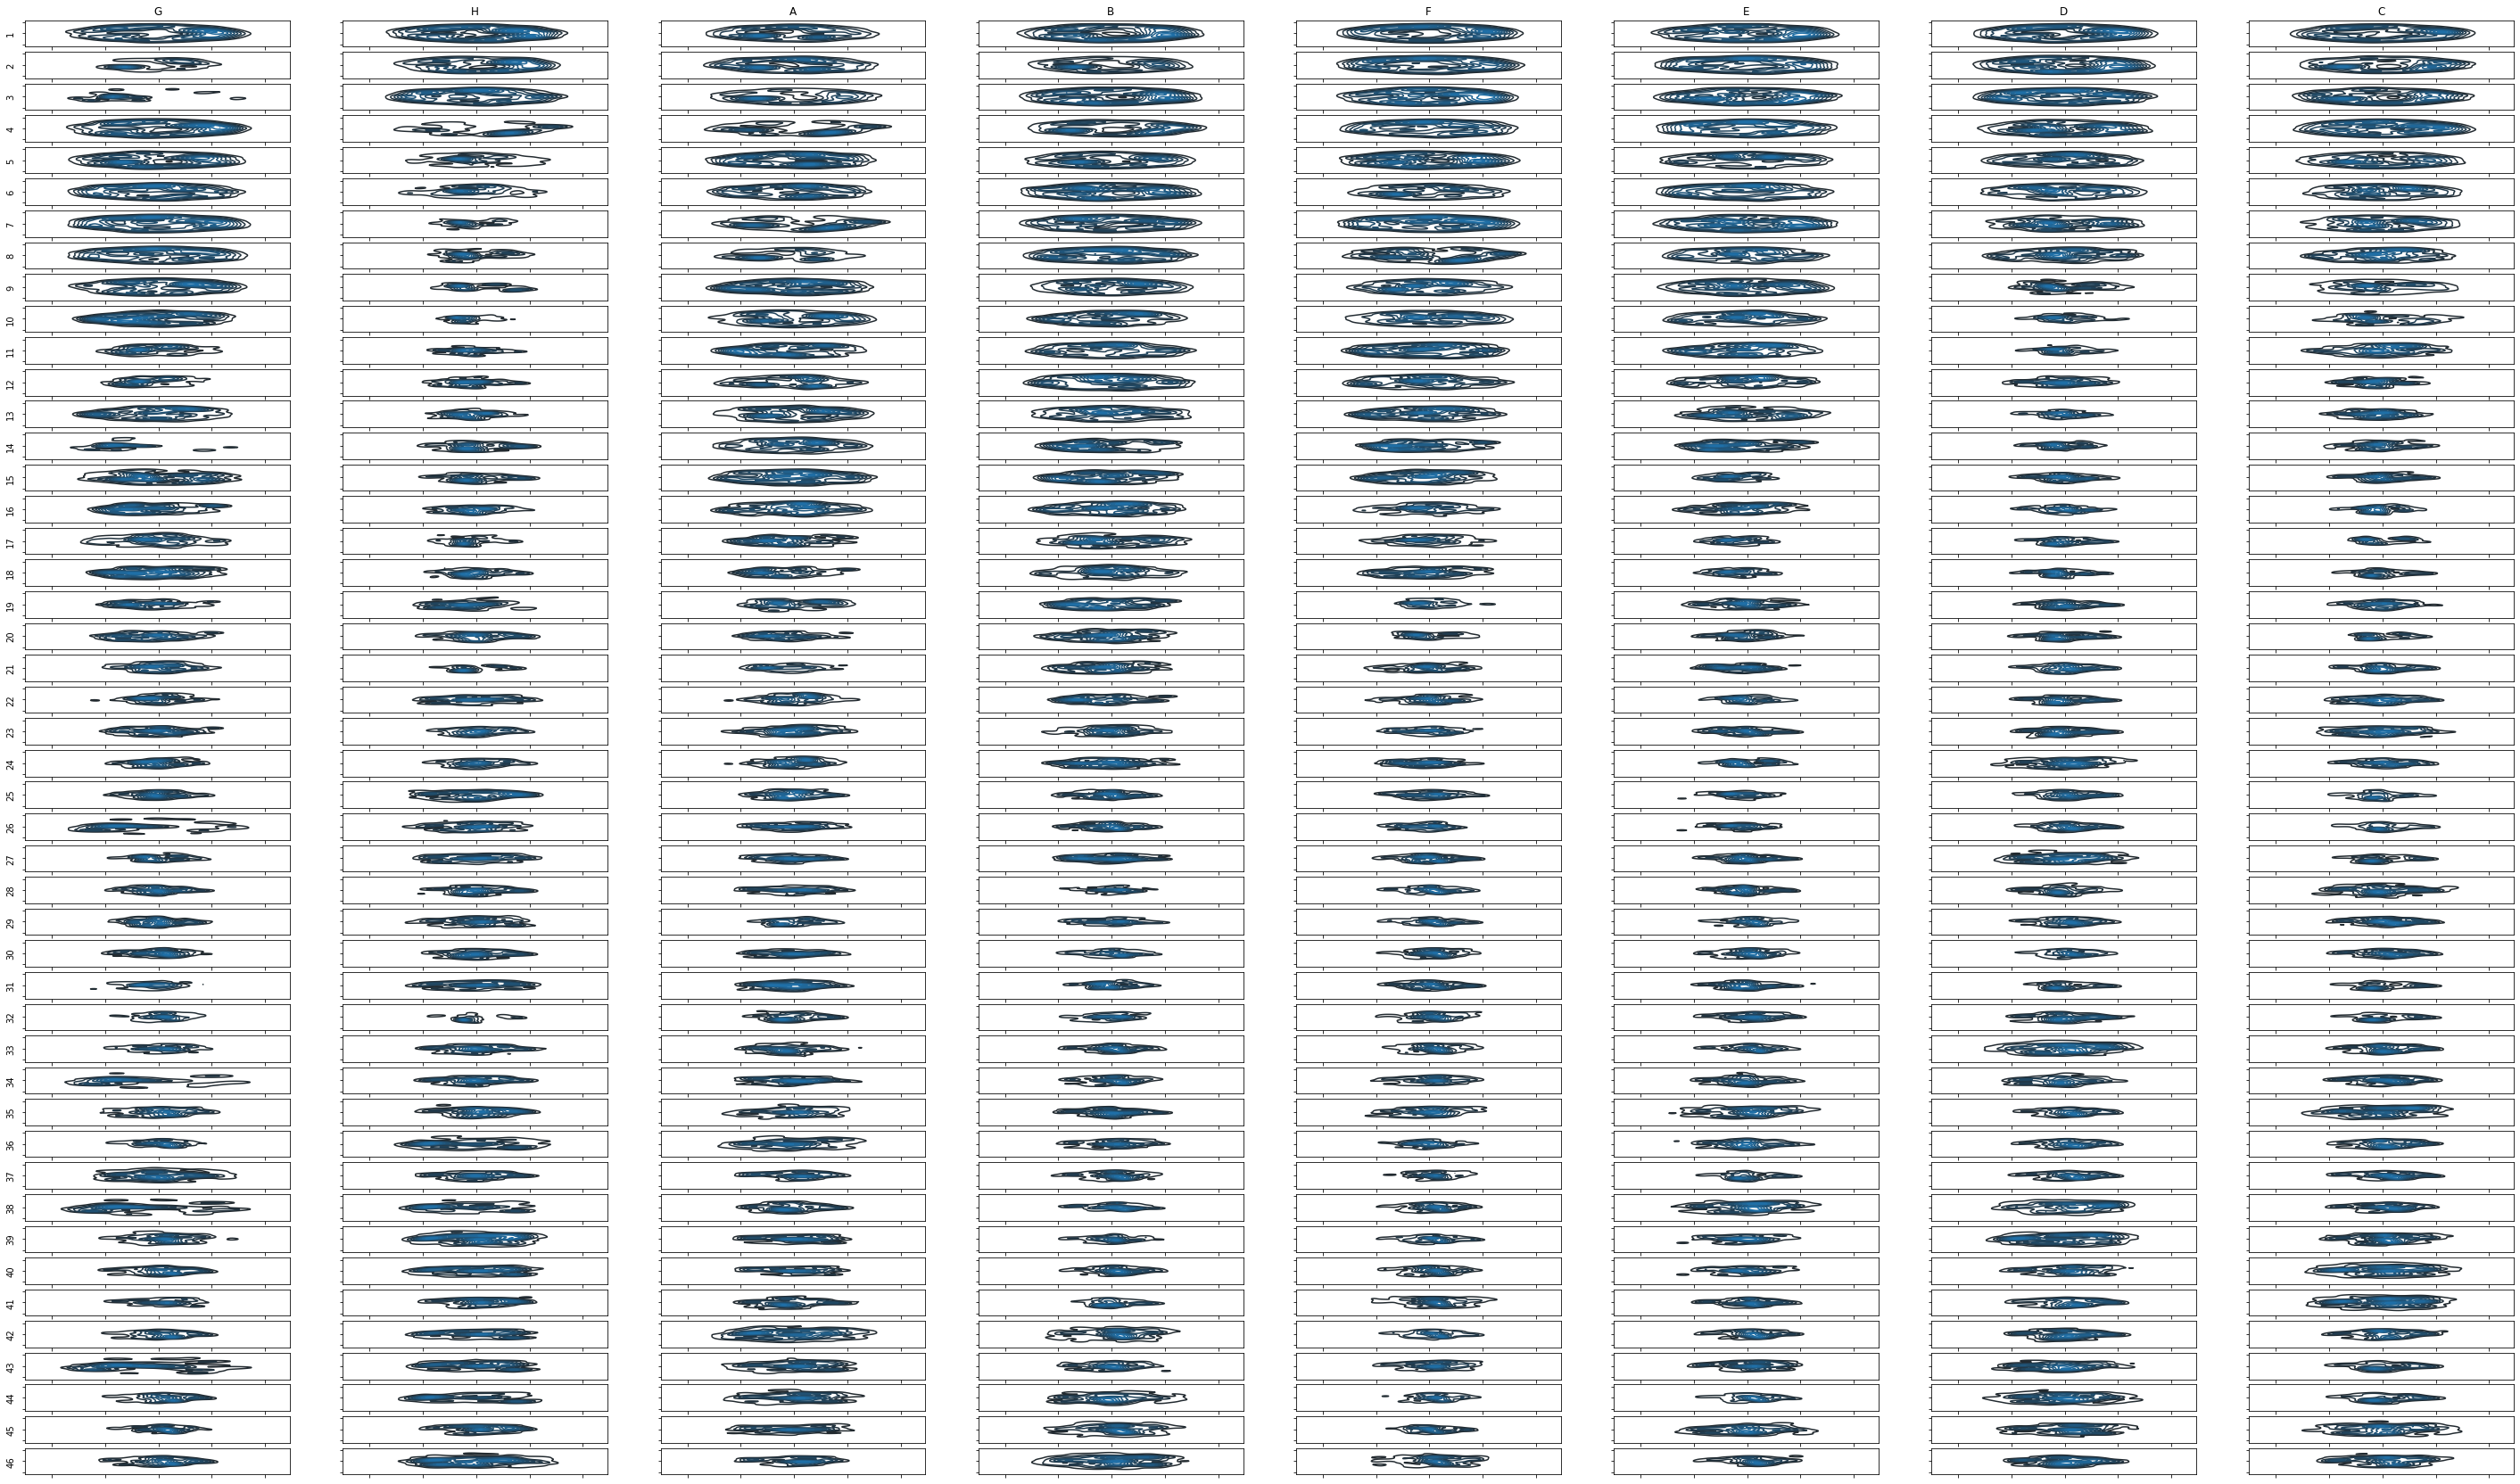

In [98]:
f, axes = plt.subplots(nrows=len(timepoint_map),
                     ncols=len(stimuli_map),
                     figsize=(50, 30),sharex=True,sharey=True)

for ind,val in tqdm.tqdm(data_df.groupby(["Timepoint","Stimuli"])):
    print(len(val))
    
    sns.kdeplot(val["embedding_1"].iloc[:1000], 
                val["embedding_2"].iloc[:1000], 
                ax=axes[ind[0]-1,stimuli_map[ind[1]]]
                )
    # Timepoint - 1 for indexing
    #axes[ind[0]-1,stimuli_map[ind[1]]].hexbin(val["embedding_1"].iloc[:1000], val["embedding_2"].iloc[:1000])
    
    axes[ind[0]-1,stimuli_map[ind[1]]].set_yticklabels([])
    axes[ind[0]-1,stimuli_map[ind[1]]].set_xticklabels([])
    axes[ind[0]-1,stimuli_map[ind[1]]].set_ylabel("")
    axes[ind[0]-1,stimuli_map[ind[1]]].set_xlabel("")

    
for ind, _ in data_df.groupby("Stimuli"):
    axes[0,stimuli_map[ind]].set_title(ind)
    
for ind, _ in data_df.groupby("Timepoint"):
    axes[ind-1,0].set_ylabel(ind)
    

pickle.dump(f,open('embed_kde_1000.p','wb'))
f.savefig('embed_kde_1000.png', dpi=300)


In [ ]:
f, axes = plt.subplots(nrows=len(timepoint_map),
                     ncols=len(stimuli_map),
                     figsize=(50, 30),sharex=True,sharey=True)

for ind,val in tqdm.tqdm(data_df.groupby(["Timepoint","Stimuli"])):
    print(len(val))
    
    sns.kdeplot(val["embedding_1"], 
                val["embedding_2"], 
                ax=axes[ind[0]-1,stimuli_map[ind[1]],],
                n_levels=25
                )

    axes[ind[0]-1,stimuli_map[ind[1]]].set_yticklabels([])
    axes[ind[0]-1,stimuli_map[ind[1]]].set_xticklabels([])
    axes[ind[0]-1,stimuli_map[ind[1]]].set_ylabel("")
    axes[ind[0]-1,stimuli_map[ind[1]]].set_xlabel("")

    
for ind, _ in data_df.groupby("Stimuli"):
    axes[0,stimuli_map[ind]].set_title(ind)
    
for ind, _ in data_df.groupby("Timepoint"):
    axes[ind-1,0].set_ylabel(ind)
    

pickle.dump(f,open('embed_kde_full_levels25.p','wb'))
f.savefig('embed_kde_full_levels25.png', dpi=300)


Exception ignored in: <function tqdm.__del__ at 0x7f8c76007a60>
Traceback (most recent call last):
  File "/home/isshamie/software/anaconda2/envs/umap/lib/python3.7/site-packages/tqdm/std.py", line 1039, in __del__
    self.close()
  File "/home/isshamie/software/anaconda2/envs/umap/lib/python3.7/site-packages/tqdm/notebook.py", line 240, in close
    super(tqdm_notebook, self).close(*args, **kwargs)
  File "/home/isshamie/software/anaconda2/envs/umap/lib/python3.7/site-packages/tqdm/std.py", line 1215, in close
    if self.disable:
AttributeError: 'tqdm_notebook' object has no attribute 'disable'
  0%|          | 0/368 [00:00<?, ?it/s]

94776


  0%|          | 1/368 [01:09<7:02:34, 69.09s/it]

100324


  1%|          | 2/368 [02:16<6:59:15, 68.73s/it]

96907


  1%|          | 3/368 [03:22<6:52:52, 67.87s/it]

105704


  1%|          | 4/368 [04:34<6:58:47, 69.03s/it]

96649


  1%|▏         | 5/368 [05:40<6:51:46, 68.06s/it]

98930


  2%|▏         | 6/368 [06:47<6:48:46, 67.75s/it]

91628


  2%|▏         | 7/368 [07:49<6:37:23, 66.05s/it]

91406


  2%|▏         | 8/368 [08:52<6:30:00, 65.00s/it]

94912


  2%|▏         | 9/368 [09:56<6:27:44, 64.80s/it]

99314


  3%|▎         | 10/368 [11:03<6:30:42, 65.48s/it]

96103


  3%|▎         | 11/368 [12:08<6:29:16, 65.42s/it]

103842


  3%|▎         | 12/368 [13:19<6:37:21, 66.97s/it]

95355


  4%|▎         | 13/368 [14:24<6:32:22, 66.32s/it]

97044


  4%|▍         | 14/368 [15:29<6:30:12, 66.14s/it]

90142


  4%|▍         | 15/368 [16:31<6:20:22, 64.65s/it]

90413


  4%|▍         | 16/368 [17:32<6:13:58, 63.75s/it]

95386


  5%|▍         | 17/368 [18:37<6:14:39, 64.04s/it]

98916


  5%|▍         | 18/368 [19:44<6:18:40, 64.92s/it]

95269


  5%|▌         | 19/368 [20:49<6:17:21, 64.88s/it]

101396


  5%|▌         | 20/368 [21:58<6:23:25, 66.11s/it]

94459


  6%|▌         | 21/368 [23:02<6:19:19, 65.59s/it]

95608


  6%|▌         | 22/368 [24:07<6:16:48, 65.34s/it]

89449


  6%|▋         | 23/368 [25:07<6:07:41, 63.95s/it]

87946


  7%|▋         | 24/368 [26:07<5:59:37, 62.73s/it]

96004


  7%|▋         | 25/368 [27:13<6:02:56, 63.49s/it]

98378


  7%|▋         | 26/368 [28:19<6:07:09, 64.41s/it]

93130


  7%|▋         | 27/368 [29:23<6:04:34, 64.15s/it]

97523


  8%|▊         | 28/368 [30:29<6:07:56, 64.93s/it]

93247


  8%|▊         | 29/368 [31:33<6:04:46, 64.56s/it]

94401


  8%|▊         | 30/368 [32:40<6:07:47, 65.29s/it]

89037


  8%|▊         | 31/368 [33:41<5:58:41, 63.86s/it]

81180


  9%|▊         | 32/368 [34:36<5:43:26, 61.33s/it]

96220


  9%|▉         | 33/368 [35:42<5:49:21, 62.57s/it]

97680


  9%|▉         | 34/368 [36:48<5:54:26, 63.67s/it]

90283


 10%|▉         | 35/368 [37:50<5:50:37, 63.18s/it]

92548


 10%|▉         | 36/368 [38:53<5:50:20, 63.32s/it]

91965


 10%|█         | 37/368 [39:56<5:48:44, 63.21s/it]

92775


 10%|█         | 38/368 [41:00<5:47:39, 63.21s/it]

88335


 11%|█         | 39/368 [42:00<5:41:23, 62.26s/it]

72508


 11%|█         | 40/368 [42:50<5:20:07, 58.56s/it]

96195


 11%|█         | 41/368 [43:55<5:30:40, 60.67s/it]

96730


 11%|█▏        | 42/368 [45:01<5:37:55, 62.19s/it]

87042


 12%|█▏        | 43/368 [46:01<5:33:16, 61.53s/it]

87078


 12%|█▏        | 44/368 [47:01<5:30:07, 61.13s/it]

90797


 12%|█▏        | 45/368 [48:03<5:31:00, 61.49s/it]

91494


 12%|█▎        | 46/368 [49:06<5:31:29, 61.77s/it]

87477


 13%|█▎        | 47/368 [50:06<5:27:05, 61.14s/it]

65069


 13%|█▎        | 48/368 [50:51<5:01:05, 56.45s/it]

95702


 13%|█▎        | 49/368 [51:57<5:14:38, 59.18s/it]

95692


 14%|█▎        | 50/368 [53:02<5:23:11, 60.98s/it]

83400


 14%|█▍        | 51/368 [54:00<5:17:00, 60.00s/it]

82357


 14%|█▍        | 52/368 [54:57<5:12:04, 59.25s/it]

89443


 14%|█▍        | 53/368 [55:59<5:14:37, 59.93s/it]

89698


 15%|█▍        | 54/368 [57:00<5:15:54, 60.37s/it]

86073


 15%|█▍        | 55/368 [57:59<5:12:43, 59.95s/it]

59716


 15%|█▌        | 56/368 [58:42<4:44:43, 54.76s/it]

95634


 15%|█▌        | 57/368 [59:47<5:00:52, 58.05s/it]

94785


 16%|█▌        | 58/368 [1:00:52<5:10:21, 60.07s/it]

80122


 16%|█▌        | 59/368 [1:01:48<5:02:48, 58.80s/it]

77823


 16%|█▋        | 60/368 [1:02:43<4:55:38, 57.59s/it]

87897


 17%|█▋        | 61/368 [1:03:43<4:59:17, 58.49s/it]

88099


 17%|█▋        | 62/368 [1:04:44<5:01:36, 59.14s/it]

84946


 17%|█▋        | 63/368 [1:05:42<4:59:17, 58.88s/it]

57226


 17%|█▋        | 64/368 [1:06:24<4:32:36, 53.80s/it]

94879


 18%|█▊        | 65/368 [1:07:29<4:49:13, 57.27s/it]

93658


 18%|█▊        | 66/368 [1:08:34<4:58:49, 59.37s/it]

76616


 18%|█▊        | 68/368 [1:10:20<4:41:07, 56.22s/it]

86565


 19%|█▉        | 69/368 [1:11:21<4:47:14, 57.64s/it]

86427


 19%|█▉        | 70/368 [1:12:21<4:49:13, 58.23s/it]

83482


 19%|█▉        | 71/368 [1:13:18<4:47:04, 57.99s/it]

56305


 20%|█▉        | 72/368 [1:14:00<4:22:28, 53.20s/it]

94234


 20%|█▉        | 73/368 [1:15:06<4:40:15, 57.00s/it]

92194


 20%|██        | 74/368 [1:16:10<4:49:25, 59.07s/it]

73691


 20%|██        | 75/368 [1:17:02<4:38:26, 57.02s/it]

71847


 21%|██        | 76/368 [1:17:55<4:30:41, 55.62s/it]

84687


 21%|██        | 77/368 [1:18:54<4:34:49, 56.66s/it]

84375


 21%|██        | 78/368 [1:19:52<4:36:47, 57.27s/it]

81675


 21%|██▏       | 79/368 [1:20:49<4:34:53, 57.07s/it]

56573


 22%|██▏       | 80/368 [1:21:32<4:13:31, 52.82s/it]

92833


 22%|██▏       | 81/368 [1:22:37<4:29:38, 56.37s/it]

90757


 22%|██▏       | 82/368 [1:23:40<4:38:09, 58.36s/it]

71234


 23%|██▎       | 83/368 [1:24:31<4:26:33, 56.12s/it]

70036


 23%|██▎       | 84/368 [1:25:22<4:19:19, 54.79s/it]

82481


 23%|██▎       | 85/368 [1:26:20<4:22:27, 55.64s/it]

82524


 23%|██▎       | 86/368 [1:27:17<4:24:07, 56.20s/it]

79744


 24%|██▎       | 87/368 [1:28:13<4:21:56, 55.93s/it]

57118


 24%|██▍       | 88/368 [1:28:56<4:02:59, 52.07s/it]

91506


 24%|██▍       | 89/368 [1:30:00<4:18:33, 55.60s/it]

89191


 24%|██▍       | 90/368 [1:31:01<4:26:27, 57.51s/it]

69323


 25%|██▍       | 91/368 [1:31:51<4:14:56, 55.22s/it]

68909


 25%|██▌       | 92/368 [1:32:43<4:08:27, 54.01s/it]

80478


 25%|██▌       | 93/368 [1:33:39<4:10:50, 54.73s/it]

80438


 26%|██▌       | 94/368 [1:34:35<4:11:58, 55.18s/it]

77420


 26%|██▌       | 95/368 [1:35:29<4:09:22, 54.81s/it]

57946


 26%|██▌       | 96/368 [1:36:13<3:53:13, 51.45s/it]

90214


 26%|██▋       | 97/368 [1:37:16<4:08:04, 54.93s/it]

87245


 27%|██▋       | 98/368 [1:38:17<4:15:01, 56.67s/it]

67604


 27%|██▋       | 99/368 [1:39:06<4:04:07, 54.45s/it]

68050


 27%|██▋       | 100/368 [1:39:57<3:58:24, 53.37s/it]

78033


 27%|██▋       | 101/368 [1:40:52<3:59:34, 53.84s/it]

78074


 28%|██▊       | 102/368 [1:41:46<3:59:56, 54.12s/it]

75105


 28%|██▊       | 103/368 [1:42:39<3:56:58, 53.65s/it]

59030


 28%|██▊       | 104/368 [1:43:23<3:43:34, 50.81s/it]

87830


 29%|██▊       | 105/368 [1:44:25<3:56:54, 54.05s/it]

85483


 29%|██▉       | 106/368 [1:45:24<4:03:30, 55.77s/it]

66692


 29%|██▉       | 107/368 [1:46:14<3:53:53, 53.77s/it]

67374


 29%|██▉       | 108/368 [1:47:04<3:48:41, 52.78s/it]

75937


 30%|██▉       | 109/368 [1:47:58<3:49:02, 53.06s/it]

75832


 30%|██▉       | 110/368 [1:48:51<3:48:40, 53.18s/it]

72492


 30%|███       | 111/368 [1:49:42<3:44:54, 52.51s/it]

59829


 30%|███       | 112/368 [1:50:27<3:33:57, 50.15s/it]

85208


 31%|███       | 113/368 [1:51:27<3:45:38, 53.09s/it]

83390


 31%|███       | 114/368 [1:52:25<3:51:31, 54.69s/it]

65535


 31%|███▏      | 115/368 [1:53:14<3:42:46, 52.83s/it]

66946


 32%|███▏      | 116/368 [1:54:04<3:38:39, 52.06s/it]

73417


 32%|███▏      | 117/368 [1:54:56<3:38:01, 52.12s/it]

73358


 32%|███▏      | 118/368 [1:55:48<3:36:54, 52.06s/it]

69949


 32%|███▏      | 119/368 [1:56:38<3:32:48, 51.28s/it]

61107


 33%|███▎      | 120/368 [1:57:23<3:24:32, 49.49s/it]

82529


 33%|███▎      | 121/368 [1:58:21<3:34:41, 52.15s/it]

81399


 33%|███▎      | 122/368 [1:59:19<3:40:10, 53.70s/it]

65111


 33%|███▎      | 123/368 [2:00:07<3:33:02, 52.17s/it]

66583


 34%|███▎      | 124/368 [2:00:57<3:29:29, 51.51s/it]

71485


 34%|███▍      | 125/368 [2:01:48<3:28:06, 51.39s/it]

71366


 34%|███▍      | 126/368 [2:02:39<3:26:34, 51.22s/it]

67391


 35%|███▍      | 127/368 [2:03:27<3:21:42, 50.22s/it]

61665


 35%|███▍      | 128/368 [2:04:12<3:15:12, 48.80s/it]

79760


 35%|███▌      | 129/368 [2:05:09<3:23:43, 51.14s/it]

79220


 35%|███▌      | 130/368 [2:06:05<3:28:40, 52.61s/it]

64712


 36%|███▌      | 131/368 [2:06:53<3:22:34, 51.29s/it]

66408


 36%|███▌      | 132/368 [2:07:43<3:19:47, 50.80s/it]

69487


 36%|███▌      | 133/368 [2:08:33<3:18:03, 50.57s/it]

69330


 36%|███▋      | 134/368 [2:09:23<3:16:07, 50.29s/it]

65065


 37%|███▋      | 135/368 [2:10:09<3:10:46, 49.13s/it]

62741


 37%|███▋      | 136/368 [2:10:55<3:06:18, 48.18s/it]

77052


 37%|███▋      | 137/368 [2:11:50<3:13:21, 50.22s/it]

77122


 38%|███▊      | 138/368 [2:12:45<3:17:40, 51.57s/it]

64625


 38%|███▊      | 139/368 [2:13:33<3:12:59, 50.57s/it]

66253


 38%|███▊      | 140/368 [2:14:22<3:10:54, 50.24s/it]

67487


 38%|███▊      | 141/368 [2:15:11<3:08:30, 49.82s/it]

67212


 39%|███▊      | 142/368 [2:16:00<3:06:08, 49.42s/it]

63061


 39%|███▉      | 143/368 [2:16:45<3:00:39, 48.17s/it]

63236


 39%|███▉      | 144/368 [2:17:31<2:57:24, 47.52s/it]

74332


 39%|███▉      | 145/368 [2:18:24<3:03:03, 49.25s/it]

74646


 40%|███▉      | 146/368 [2:19:18<3:06:38, 50.44s/it]

64738


 40%|███▉      | 147/368 [2:20:06<3:03:15, 49.75s/it]

66189


 40%|████      | 148/368 [2:20:55<3:01:52, 49.60s/it]

65943


 40%|████      | 149/368 [2:21:43<2:59:25, 49.16s/it]

65346


 41%|████      | 150/368 [2:22:30<2:56:39, 48.62s/it]

61140


## Color based on features

In [ ]:
raw = pd.read_csv("fc.tsv",sep="\t", index_col=0)
raw = raw.drop(["Timepoint","Stimuli","Sample"],axis=1)

In [104]:
data_df = pd.concat((data_df,raw),axis=1)

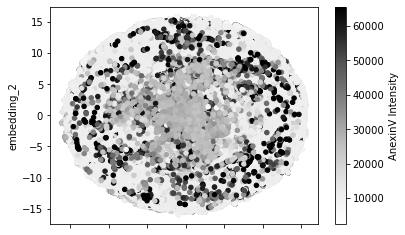

In [106]:
data_df.plot.scatter(x="embedding_1",y="embedding_2", c="AnexinV Intensity")
plt.savefig("anexinv_intensity.png")
plt.savefig("anexinv_intensity.pdf")

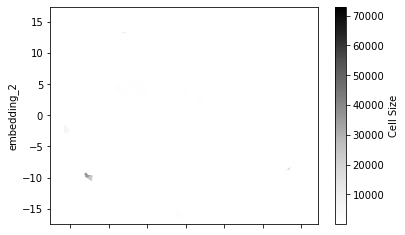

In [108]:
data_df.plot.scatter(x="embedding_1",y="embedding_2", c="Cell Size")
plt.savefig("cell_size.png")
plt.savefig("cell_size.pdf")

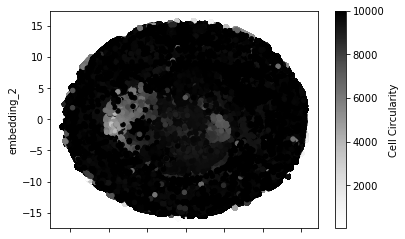

In [109]:
data_df.plot.scatter(x="embedding_1",y="embedding_2", c="Cell Circularity")
plt.savefig("cell_circularity.png")
plt.savefig("cell_circularity.pdf")